# FLIGHT PRICE PREDICTION MODEL:

NAME: Vaibhav Vilas Tayade
contact: 8087970061
email id: vaibhav_t29@rediffmail.com

# IMPORTING LIBRARIES:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# IMPORTING DATAFILE:

In [2]:
#reading file.
df = pd.read_excel('Data_Train.xlsx')

In [3]:
# checking dataset.
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
#checking column headings
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
#checking null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Observation: There are null values present in Route and Total_Stops columns.

In [6]:
# checking rows containing null values.
df[df['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


Note: There is only one row having null values at Route and Total_Stops column, we can remove this row.

In [7]:
# removing null values
df1 = df.dropna() 

In [8]:
# again checking null values for confirmation.
df1[df1['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


Observation: Null values have been removed.

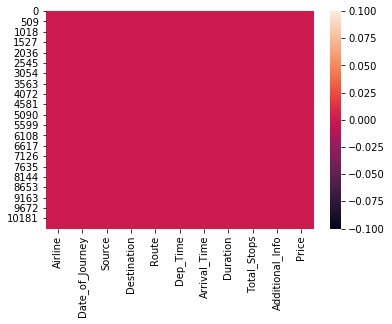

In [9]:
# checking null values using heatmap.
sns.heatmap(df1.isnull())

Observation: Now there is no Null values 

In [11]:
# checking test dataset.
test_data = pd.read_excel('Test_set.xlsx')

In [12]:
#checking null values in test dataset.
test_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Observation: there are no missing values in the test dataset.

In [13]:
# creating new columns like date, month, year from Date_of_Journey columns
dataset = [df1, test_data]
for dt in dataset:
    dt["Date_of_Journey"] = dt["Date_of_Journey"].str.split("/")
    dt["Date"] = dt["Date_of_Journey"].str[0].astype("int")
    dt["Month"] = dt["Date_of_Journey"].str[1].astype("int")
    dt["Year"] = dt["Date_of_Journey"].str[2].astype("int")
    

In [14]:
# removing Date_of_Journey column now
for dt in dataset:
    dt.drop("Date_of_Journey",axis=1,inplace=True)

In [15]:
# extracting hours and minutes from Duration columns.
for dt in dataset:
    dt["Duration"] = dt["Duration"].str.split() 

In [16]:
#creating new column like JourneyHours from Duration column.
for dt in dataset:
    dt["JourneyHours"] = dt["Duration"].str[0]

In [17]:
#creating new column like JourneyMinutes from Duration column.
for dt in dataset:
    dt["JourneyMinutes"] = dt["Duration"].str[1]

In [18]:
# replacing null minutes values by Om:
for dt in dataset:
    dt["JourneyMinutes"].fillna('0m', inplace=True)

In [19]:
# removing Duration column now
for dt in dataset:
    dt.drop("Duration",axis=1,inplace=True)

In [20]:
# checking unique value in Total_Stops column.
df1['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [21]:
# we can encode this Total stops columns

In [22]:
# removing 'Route' column:
for dt in dataset:
    dt.drop("Route",axis=1,inplace=True)

In [23]:
# removing 'Dep_Time' column:
for dt in dataset:
    dt.drop("Dep_Time",axis=1,inplace=True)

In [24]:
# removing 'Arrival_Time' column:
for dt in dataset:
    dt.drop("Arrival_Time",axis=1,inplace=True)

In [25]:
# rearranging columns:
df1 = df1[['Airline', 'Date', 'Month', 'Year', 'Source', 'Destination', 'Total_Stops', 'JourneyHours', 'JourneyMinutes', 'Additional_Info', 'Price']]

In [26]:
# rearranging columns:
test_data = test_data[['Airline', 'Date', 'Month', 'Year', 'Source', 'Destination', 'Total_Stops', 'JourneyHours', 'JourneyMinutes', 'Additional_Info']]

In [27]:
# checking unique values of Additional_Info column.
df1['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [28]:
# checking unique values of Additional_Info column.
test_data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)

In [29]:
#replacing spell mistakes and organizing proper categories:

df1['Additional_Info'].replace(['No Info'],['No info'],inplace = True)

In [30]:
df1['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [31]:
# spelling mistake of 'No Info' is regularised throughout the dataset.

In [32]:
#checking datatypes of our dataframe:
df1.dtypes

Airline            object
Date                int32
Month               int32
Year                int32
Source             object
Destination        object
Total_Stops        object
JourneyHours       object
JourneyMinutes     object
Additional_Info    object
Price               int64
dtype: object

In [33]:
# checking details of the dataset.
df1.describe()

,Date,Month,Year,Price
count,10682.000000,10682.000000,10682.0,10682.000000
mean,13.509081,4.708575,2019.0,9087.214567
std,8.479363,1.164408,0.0,4611.548810
min,1.000000,3.000000,2019.0,1759.000000
25%,6.000000,3.000000,2019.0,5277.000000
50%,12.000000,5.000000,2019.0,8372.000000
75%,21.000000,6.000000,2019.0,12373.000000
max,27.000000,6.000000,2019.0,79512.000000


Observation: Most of our columns are datatype object. 
     Original neumerical columns are very few.

In [34]:
# checking skewness in the dataset.
df1.skew()

Date     0.118174
Month   -0.387409
Year     0.000000
Price    1.812405
dtype: float64

Observation: there is no need of removing skewness in this dataset, as most of the columns are object datatype in nature.

In [35]:
df1.head()

,Airline,Date,Month,Year,Source,Destination,Total_Stops,JourneyHours,JourneyMinutes,Additional_Info,Price
0,IndiGo,24,3,2019,Banglore,New Delhi,non-stop,2h,50m,No info,3897
1,Air India,1,5,2019,Kolkata,Banglore,2 stops,7h,25m,No info,7662
2,Jet Airways,9,6,2019,Delhi,Cochin,2 stops,19h,0m,No info,13882
3,IndiGo,12,5,2019,Kolkata,Banglore,1 stop,5h,25m,No info,6218
4,IndiGo,1,3,2019,Banglore,New Delhi,1 stop,4h,45m,No info,13302


In [36]:
test_data.head()

,Airline,Date,Month,Year,Source,Destination,Total_Stops,JourneyHours,JourneyMinutes,Additional_Info
0,Jet Airways,6,6,2019,Delhi,Cochin,1 stop,10h,55m,No info
1,IndiGo,12,5,2019,Kolkata,Banglore,1 stop,4h,0m,No info
2,Jet Airways,21,5,2019,Delhi,Cochin,1 stop,23h,45m,In-flight meal not included
3,Multiple carriers,21,5,2019,Delhi,Cochin,1 stop,13h,0m,No info
4,Air Asia,24,6,2019,Banglore,Delhi,non-stop,2h,50m,No info


# BIVARIATE ANALYSIS:

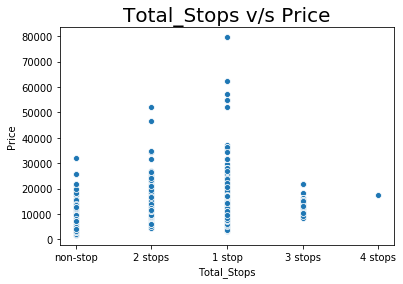

In [90]:
# scatter plot 1 >>>
plt.title('Total_Stops v/s Price', fontsize = 20)

sns.scatterplot(df['Total_Stops'], df['Price'])

Observation: It is clearly seen from the above plot that, flight with single stop is highly expensive while flight with 4 stop is least expensive.
    It is also seen that non-stop flight is moderately expensive.

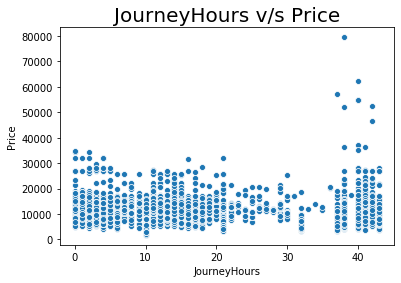

In [92]:
# scatter plot 2 >>>
plt.title('JourneyHours v/s Price', fontsize = 20)

sns.scatterplot(df1['JourneyHours'], df['Price'])

Observation: There is no clear pattern in the above plot, but journey with maximum hours are having few flights with expensive pricings.

# ENCODING THE CATEGORICAL DATA:

In [37]:
# LABEL ENCODING THE CATEGORICAL DATASET:

dataset = [df1, test_data]
for dt in dataset:
    LE = LabelEncoder()
    
    dt['Airline'] = LE.fit_transform(dt['Airline'])
    dt['Source'] = LE.fit_transform(dt['Source'])
    dt['Destination'] = LE.fit_transform(dt['Destination'])
    dt['Total_Stops'] = LE.fit_transform(dt['Total_Stops'])
    dt['Additional_Info'] = LE.fit_transform(dt['Additional_Info'])
    

In [38]:
for dt in dataset:
    LE = LabelEncoder()
    
    dt['JourneyHours'] = LE.fit_transform(dt['JourneyHours'])
    dt['JourneyMinutes'] = LE.fit_transform(dt['JourneyMinutes'])

In [39]:
df1.head()

,Airline,Date,Month,Year,Source,Destination,Total_Stops,JourneyHours,JourneyMinutes,Additional_Info,Price
0,3,24,3,2019,0,5,4,21,9,7,3897
1,1,1,5,2019,3,0,1,41,4,7,7662
2,4,9,6,2019,2,1,1,9,0,7,13882
3,3,12,5,2019,3,0,0,38,4,7,6218
4,3,1,3,2019,0,5,0,37,8,7,13302


In [40]:
test_data.head()

,Airline,Date,Month,Year,Source,Destination,Total_Stops,JourneyHours,JourneyMinutes,Additional_Info
0,4,6,6,2019,2,1,0,0,10,5
1,3,12,5,2019,3,0,0,34,0,5
2,4,21,5,2019,2,1,0,14,8,3
3,6,21,5,2019,2,1,0,3,0,5
4,0,24,6,2019,0,2,4,21,9,5


In [41]:
for dt in dataset:
    dt.drop("Additional_Info", axis=1, inplace=True)

# Checking correlation matrix:

In [42]:
df_cor = df1.corr()

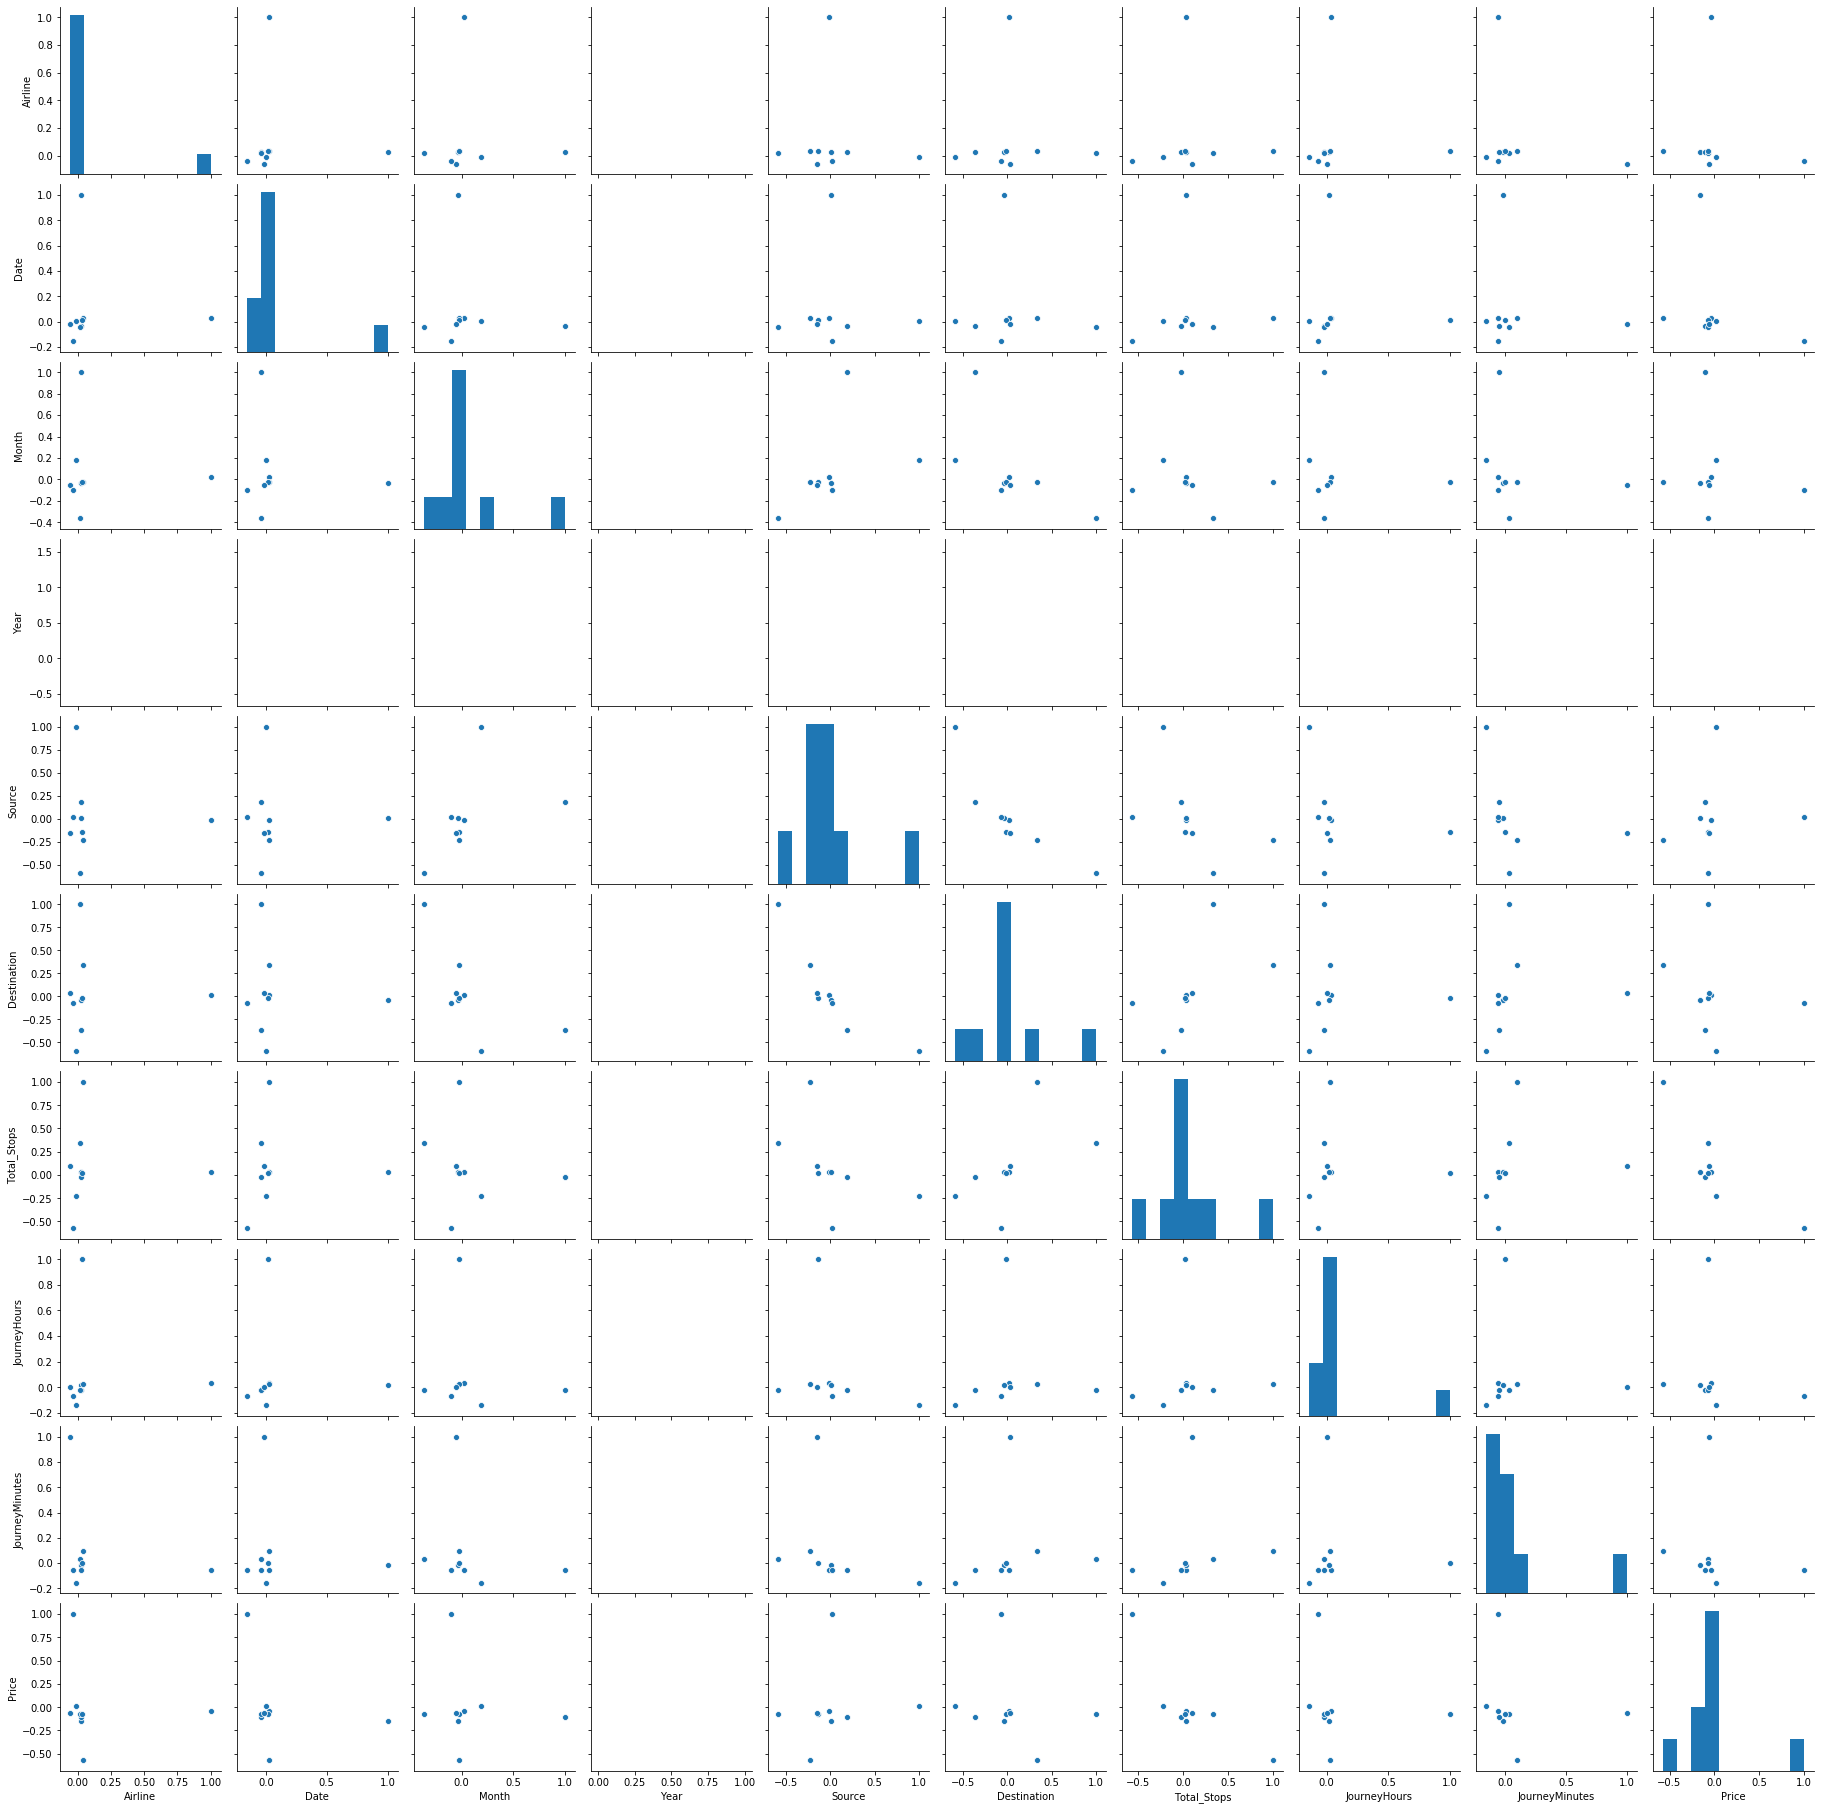

In [43]:
sns.pairplot(df_cor)

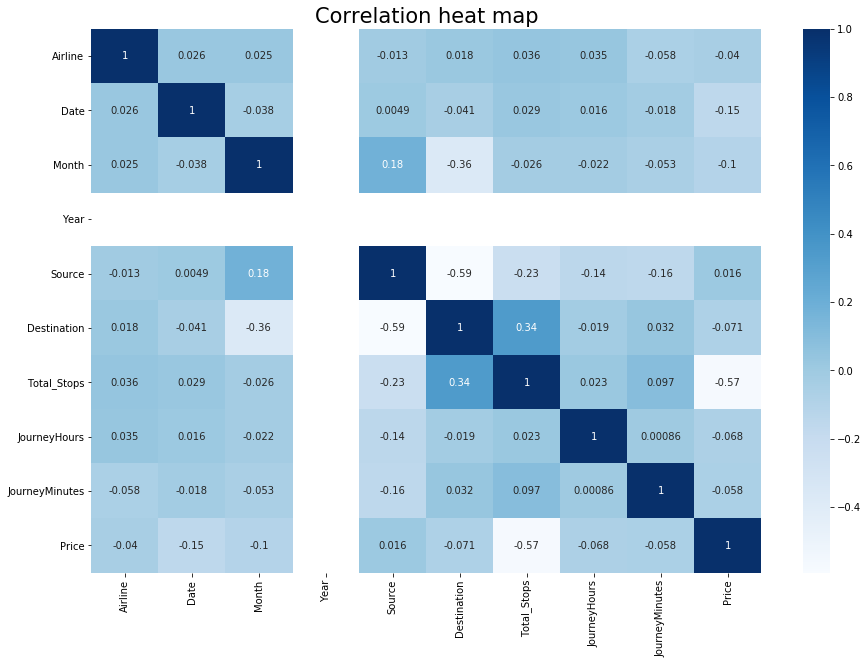

In [44]:
plt.figure(figsize=(15,10))
plt.title('Correlation heat map', fontsize = 21)

sns.heatmap(df_cor,cmap='Blues', annot=True)

Observation:

Most of the data are originally object datatype in nature, thats why correlation is not properly seen, we can see that Total stops column are negativelly correlated with the price.
Date is also negatively correlated by -0.15 values with the price.

In [45]:
# creating x,y dataset for further model building.
x = df1.iloc[:,0:9]

In [46]:
y = df1.iloc[:,-1]

In [47]:
x.shape

(10682, 9)

In [48]:
y.shape

(10682,)

In [49]:
#creating train test dataset from the x and y part inoder to start model making.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8545, 9)
(8545,)
(2137, 9)
(2137,)


# LINEAR REGRESSION METHOD:

In [50]:
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [51]:
LR.score(x_train, y_train)

0.36945757092288445

In [52]:
predicted_x_values = LR.predict(x_test)

In [53]:
from sklearn.model_selection import KFold
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(LR, x, y, cv=cv1).mean())

0.37578509446558106


In [54]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, predicted_x_values))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, predicted_x_values))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, predicted_x_values)))
print('\n')
print('r2 Score of Linear Regression model:')
print(r2_score(y_test, predicted_x_values))

ERRORS:
MEAN ABSOLUTE ERROR:  2612.099766261012
MEAN SQUARED ERROR:  12987362.102475885
ROOT MEAN SQUARED ERROR:  3603.7982882614124


r2 Score of Linear Regression model:
0.39767516106881506


# REGULARIZATION METHODS:

In [55]:
LS = Lasso(alpha = 0.01)
LS.fit(x_train, y_train)
LS.score(x_train, y_train)

0.3694575709135679

In [56]:
print(cross_val_score(LS, x, y, cv=cv1).mean())

0.3761108594643976


In [57]:
RD = Ridge(alpha= 0.01)

RD.fit(x_train, y_train)
RD.score(x_train, y_train)

0.3694575709228167

In [58]:
print(cross_val_score(RD, x, y, cv=cv1).mean())

0.3740941753546845


# ELASTIC NET REGULARIZATION METHOD:

In [59]:
# elastic net is a combination of both lasso and ridge methods.
ENR = ElasticNet(alpha= 0.01)

ENR.fit(x_train, y_train)
enrpred=ENR.predict(x_test)
print(ENR.score(x_train, y_train))
ENR.coef_

0.36945633881492335


array([  -32.06855415,   -72.70638783,  -416.28610429,     0.        ,
        -351.14456616,    65.86646964, -1504.84537718,   -23.60800347,
         -38.21567821])

In [60]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, enrpred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, enrpred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, enrpred)))


ERRORS:
MEAN ABSOLUTE ERROR:  2612.3843945288336
MEAN SQUARED ERROR:  12988556.208255446
ROOT MEAN SQUARED ERROR:  3603.9639576798554


In [61]:
print(cross_val_score(ENR, x, y, cv=cv1).mean())

0.3752944479204829


# SUPPORT VECTOR REGRESSOR METHOD:

In [62]:
kernellist = ['linear', 'poly', 'rbf']

for i in kernellist:
    sv = SVR(kernel = i)
    sv.fit(x_train, y_train)
    print('\nkernel : ' + i)
    print(sv.score(x_train, y_train))


kernel : linear
0.34069585078423337

kernel : poly
-0.02394141720683951

kernel : rbf
-0.023941248743376997


In [63]:
# support vector linear model is best model among all kernel paramters as it gave higher accuracy:

sv_lr = SVR('linear')
sv_lr.fit(x_train, y_train)
print(sv_lr.score(x_train, y_train))

0.34069585078423337


In [64]:
print(cross_val_score(sv_lr, x, y, cv=cv1).mean())

0.347943014024024


In [65]:
# predicting x_test dataset
svpred=sv_lr.predict(x_test)

In [66]:
# checking errors:

print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, svpred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, svpred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, svpred)))

ERRORS:
MEAN ABSOLUTE ERROR:  2599.3843402477364
MEAN SQUARED ERROR:  13967809.4251784
ROOT MEAN SQUARED ERROR:  3737.35326470196


In [67]:
print(r2_score(y_test, svpred))

0.35220420468308966


# DECISION TREE REGRESSOR METHOD:

In [68]:
# checking decision tree regressor method.

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
preddtr = dtr.predict(x_test)

print(dtr.score(x_train, y_train))

0.9400608834608726


In [69]:
y_pred = dtr.predict(x_test)
y_pred

array([16840.,  4959.,  7927., ...,  7452., 13339., 14335.])

In [70]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, y_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, y_pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  1498.2745504378634
MEAN SQUARED ERROR:  6469522.879882645
ROOT MEAN SQUARED ERROR:  2543.5256790295325


In [71]:
# checking cross validation score of decision tree regressor model
print(cross_val_score(dtr, x, y, cv=cv1).mean())

0.6625472904102082


# RANDOM FOREST REGRESSOR METHOD:

In [72]:
# Using Random forest regressor algorithm.

rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)

In [73]:
print(rf.score(x_train, y_train))

0.926214786679247


In [74]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, pred)))


ERRORS:
MEAN ABSOLUTE ERROR:  1340.722847661679
MEAN SQUARED ERROR:  4485221.678429186
ROOT MEAN SQUARED ERROR:  2117.8341952167043


In [75]:
# checking cross validation score of random forest regressor model
print(cross_val_score(rf, x, y, cv=cv1).mean())

0.7648501710095612


# ADA BOOST REGRESSOR METHOD:

In [76]:
# Using ada boost regressor algorithm.

adr = AdaBoostRegressor(n_estimators=100)
adr.fit(x_train, y_train)
pred=adr.predict(x_test)
print(adr.score(x_train, y_train))

0.5278395224584969


In [77]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  2346.1878737902816
MEAN SQUARED ERROR:  9870942.580101267
ROOT MEAN SQUARED ERROR:  3141.805624175574


In [78]:
# checking cross validation score of ada boost regressor model.

print(cross_val_score(adr, x, y, cv=cv1).mean())

0.3693545213490464


# OBSERVATION:

Lasso Reguralization model is our best fit model, as it has least overfitting.

# HYPER PARAMETER TUNING OF MODEL:

In [79]:
parameters = {'alpha' :  [0.001, 0.01, 0.1],
              'fit_intercept' : ['True', 'False'],
              'normalize' : ['True', 'False'],
              }

In [80]:
# hyper parameter tuning of lasso model.
gs_ls = GridSearchCV(Lasso(), parameters, cv = 5)

In [81]:
gs_ls.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1],
                         'fit_intercept': ['True', 'False'],
                         'normalize': ['True', 'False']})

In [82]:
gs_ls.best_params_

{'alpha': 0.01, 'fit_intercept': 'True', 'normalize': 'True'}

# FINAL MODEL MAKING:

In [83]:
LS_2 = Lasso(alpha = 0.01, fit_intercept = True, normalize = True)
LS_2.fit(x_train, y_train)
LS_2.score(x_train, y_train)

0.3694572608927037

In [84]:
from sklearn.model_selection import KFold
cv1 = KFold(n_splits=10, shuffle=True)
print(cross_val_score(LS_2, x, y, cv=cv1).mean())

0.37838814506173557


# OBSERVATION:

OBSERVATION: Accuracy of our model is not increased even after hypertuning the model, so considering the same model as the final model.

# SAVING THE MODEL:

In [85]:
import joblib
joblib.dump(LS_2, 'Vaibhav_Flight_Price_Prediction_Model.pkl')

['Vaibhav_Flight_Price_Prediction_Model.pkl']

# RELOADING THE MODEL:

# PREDICTING TEST DATASET USING MODEL:

In [87]:
#Reloading the model and predicting the test_data dataset.
Vaibhav_Flight_Price_Prediction_Model = joblib.load('Vaibhav_Flight_Price_Prediction_Model.pkl')
Vaibhav_Flight_Price_Prediction_Model.predict(test_data)

array([11518.28853754, 10691.68339861, 10592.31449143, ...,
       12049.45267525, 13049.83348726, 10972.6616199 ])

# CONCLUSION:

Our Model is having an accuracy of 36.94% which is not good but ok.

# THANK YOU